In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

# data (as pandas dataframes)
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

# metadata
print(diabetes_130_us_hospitals_for_years_1999_2008.metadata)

# variable information
print(diabetes_130_us_hospitals_for_years_1999_2008.variables)


{'uci_id': 296, 'name': 'Diabetes 130-US Hospitals for Years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide pro

/usr/local/lib/python3.11/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [6]:
# View first 5 rows
print(X.head())



              race  gender      age weight  admission_type_id  \
0        Caucasian  Female   [0-10)    NaN                  6   
1        Caucasian  Female  [10-20)    NaN                  1   
2  AfricanAmerican  Female  [20-30)    NaN                  1   
3        Caucasian    Male  [30-40)    NaN                  1   
4        Caucasian    Male  [40-50)    NaN                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital payer_code  \
0                        25                    1                 1        NaN   
1                         1                    7                 3        NaN   
2                         1                    7                 2        NaN   
3                         1                    7                 2        NaN   
4                         1                    7                 1        NaN   

          medical_specialty  ...  examide  citoglipton  insulin  \
0  Pediatrics-Endocrinology  ...       No           No 

In [7]:
print(y.head())

  readmitted
0         NO
1        >30
2         NO
3         NO
4         NO


In [8]:
# Shape of features and targets
print("Features shape:", X.shape)
print("Targets shape:", y.shape)


Features shape: (101766, 47)
Targets shape: (101766, 1)


In [9]:
# Count missing values in each column
print(X.isnull().sum())

# Percentage of missing values
print((X.isnull().sum() / len(X)) * 100)


race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

In [10]:
# Check for "?" in object columns
for col in X.select_dtypes(include='object'):
    print(f"{col}: {(X[col] == '?').sum()} '?' values")


race: 0 '?' values
gender: 0 '?' values
age: 0 '?' values
weight: 0 '?' values
payer_code: 0 '?' values
medical_specialty: 0 '?' values
diag_1: 0 '?' values
diag_2: 0 '?' values
diag_3: 0 '?' values
max_glu_serum: 0 '?' values
A1Cresult: 0 '?' values
metformin: 0 '?' values
repaglinide: 0 '?' values
nateglinide: 0 '?' values
chlorpropamide: 0 '?' values
glimepiride: 0 '?' values
acetohexamide: 0 '?' values
glipizide: 0 '?' values
glyburide: 0 '?' values
tolbutamide: 0 '?' values
pioglitazone: 0 '?' values
rosiglitazone: 0 '?' values
acarbose: 0 '?' values
miglitol: 0 '?' values
troglitazone: 0 '?' values
tolazamide: 0 '?' values
examide: 0 '?' values
citoglipton: 0 '?' values
insulin: 0 '?' values
glyburide-metformin: 0 '?' values
glipizide-metformin: 0 '?' values
glimepiride-pioglitazone: 0 '?' values
metformin-rosiglitazone: 0 '?' values
metformin-pioglitazone: 0 '?' values
change: 0 '?' values
diabetesMed: 0 '?' values


In [11]:
# Data types
print(X.dtypes)

# Unique value counts for each column
print(X.nunique())


race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide           

In [12]:
# Numerical statistics
print(X.describe())

# Categorical distribution
print(X.select_dtypes(include='object').describe())


       admission_type_id  discharge_disposition_id  admission_source_id  \
count      101766.000000             101766.000000        101766.000000   
mean            2.024006                  3.715642             5.754437   
std             1.445403                  5.280166             4.064081   
min             1.000000                  1.000000             1.000000   
25%             1.000000                  1.000000             1.000000   
50%             1.000000                  1.000000             7.000000   
75%             3.000000                  4.000000             7.000000   
max             8.000000                 28.000000            25.000000   

       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
count     101766.000000       101766.000000   101766.000000    101766.000000   
mean           4.395987           43.095641        1.339730        16.021844   
std            2.985108           19.674362        1.705807         8.127566   
min 

In [13]:
print(y['readmitted'].value_counts())


readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64


In [14]:
# Map '<30' and '>30' to 1 (readmitted), and 'NO' to 0
y_binary = y['readmitted'].replace({'NO': 0, '>30': 1, '<30': 1})

<ipython-input-14-1553480244>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_binary = y['readmitted'].replace({'NO': 0, '>30': 1, '<30': 1})


In [15]:
# Check columns with missing values or '?'
import numpy as np

# Replace '?' with NaN
X_cleaned = X.replace('?', np.nan)

# View missing counts
print(X_cleaned.isnull().sum().sort_values(ascending=False).head(10))


weight               98569
max_glu_serum        96420
A1Cresult            84748
medical_specialty    49949
payer_code           40256
race                  2273
diag_3                1423
diag_2                 358
diag_1                  21
time_in_hospital         0
dtype: int64


In [16]:
# Drop columns with more than 40% missing values
threshold = len(X_cleaned) * 0.4
X_reduced = X_cleaned.dropna(thresh=threshold, axis=1)

# Optional: impute or drop remaining missing values
X_final = X_reduced.fillna('Unknown')  # for categorical


In [17]:
# See which columns are object types (categorical)
print(X_final.select_dtypes(include='object').columns.tolist())


['race', 'gender', 'age', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']


In [18]:
import numpy as np

# Step 1: Replace "?" with np.nan (if not done yet)
X.replace('?', np.nan, inplace=True)

# Step 2: Drop columns with too many missing values
X.drop(columns=['weight', 'max_glu_serum', 'A1Cresult'], inplace=True)

# Step 3: Fill remaining missing values
X['race'].fillna('Unknown', inplace=True)
X['medical_specialty'].fillna('Unknown', inplace=True)
X['payer_code'].fillna('Unknown', inplace=True)

# Fill diagnoses with 'Unknown' (optional: can also use mode or 'missing')
for col in ['diag_1', 'diag_2', 'diag_3']:
    X[col].fillna('Unknown', inplace=True)

# Confirm no missing values left
print("Remaining missing values:\n", X.isnull().sum().sum())


<ipython-input-18-1434359261>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('?', np.nan, inplace=True)
<ipython-input-18-1434359261>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['weight', 'max_glu_serum', 'A1Cresult'], inplace=True)
<ipython-input-18-1434359261>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[co

Remaining missing values:
 0


In [19]:
from sklearn.preprocessing import LabelEncoder

X_encoded = X.copy()
label_encoders = {}

for col in X.select_dtypes(include='object').columns:
    if X[col].nunique() <= 10:  # safe to label encode
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X[col])
        label_encoders[col] = le


In [20]:
# Group specialties appearing in <1% of rows as "Other"
freq = X['medical_specialty'].value_counts(normalize=True)
rare_specialties = freq[freq < 0.01].index
X_encoded['medical_specialty'] = X['medical_specialty'].replace(rare_specialties, 'Other')


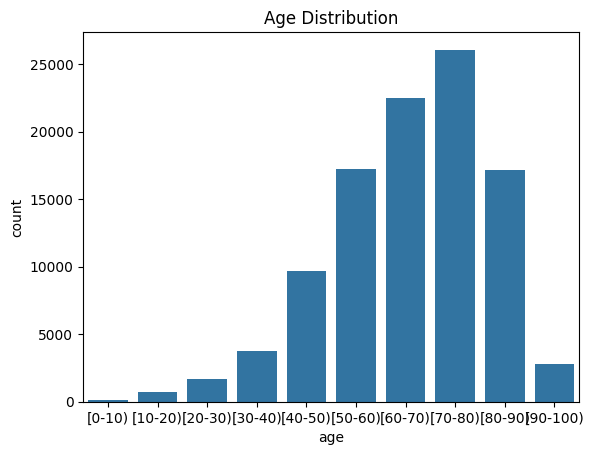

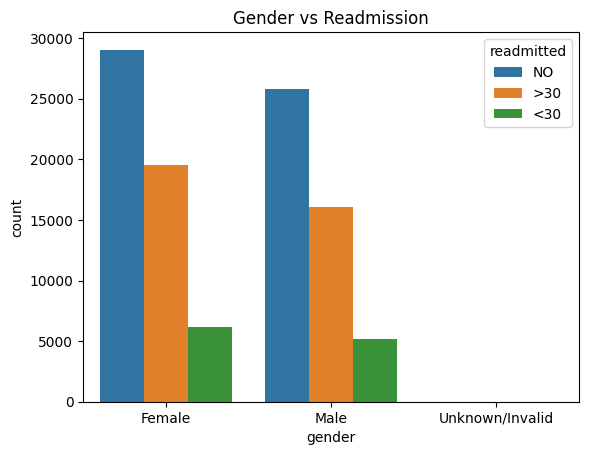

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age distribution
sns.countplot(x='age', data=X, order=sorted(X['age'].unique()))
plt.title("Age Distribution")
plt.show()

# Gender vs Readmission
sns.countplot(x='gender', hue=y['readmitted'], data=X)
plt.title("Gender vs Readmission")
plt.show()


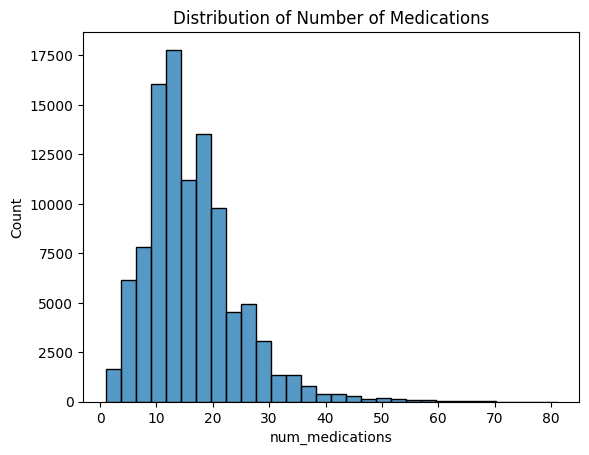

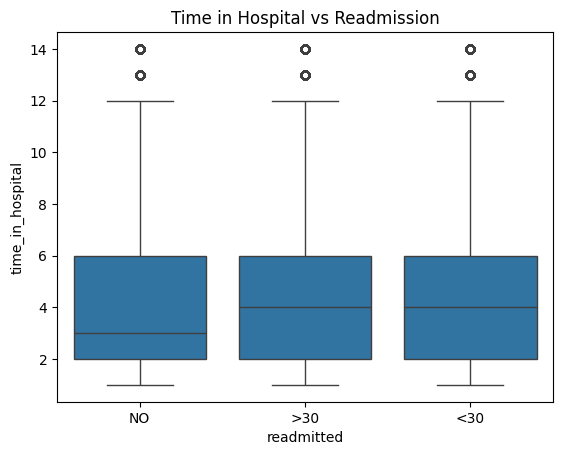

In [22]:
# Distribution of num_medications
sns.histplot(X['num_medications'], bins=30)
plt.title("Distribution of Number of Medications")
plt.show()

# Boxplot: time in hospital vs readmission
X_temp = X.copy()
X_temp['readmitted'] = y['readmitted']
sns.boxplot(x='readmitted', y='time_in_hospital', data=X_temp)
plt.title("Time in Hospital vs Readmission")
plt.show()


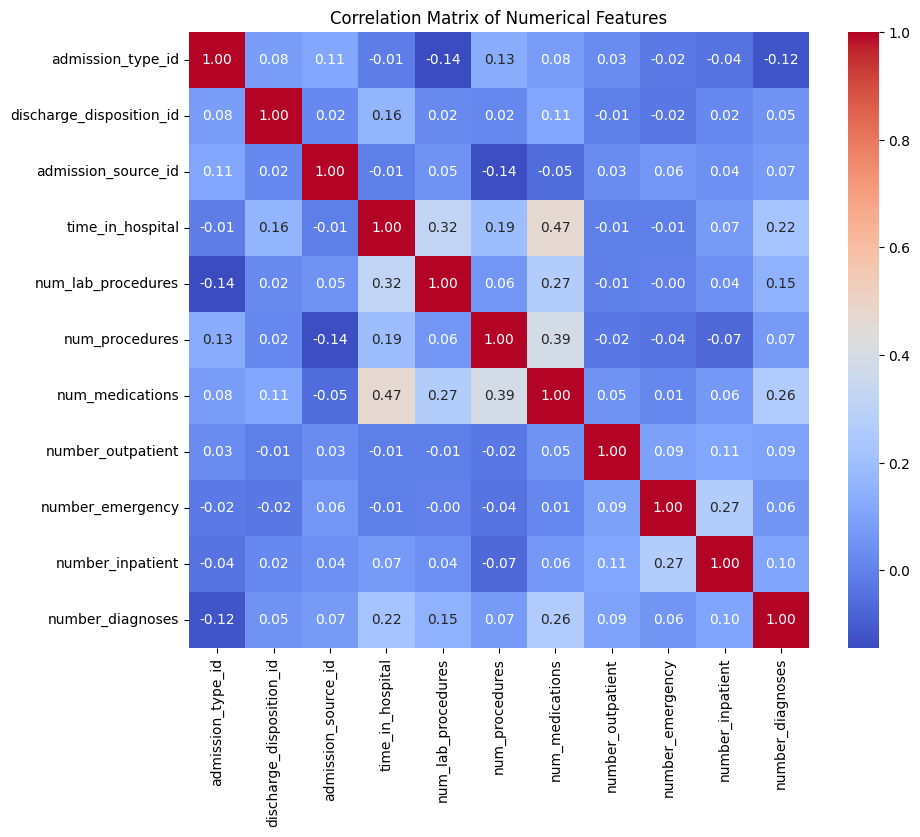

In [23]:
# Correlation heatmap (numerical columns only)
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
corr = X[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [24]:
from sklearn.preprocessing import LabelEncoder

X_encoded = X.copy()
label_encoders = {}

for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])
    label_encoders[col] = le


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)


In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[8117 2856]
 [4548 4833]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.74      0.69     10973
           1       0.63      0.52      0.57      9381

    accuracy                           0.64     20354
   macro avg       0.63      0.63      0.63     20354
weighted avg       0.64      0.64      0.63     20354



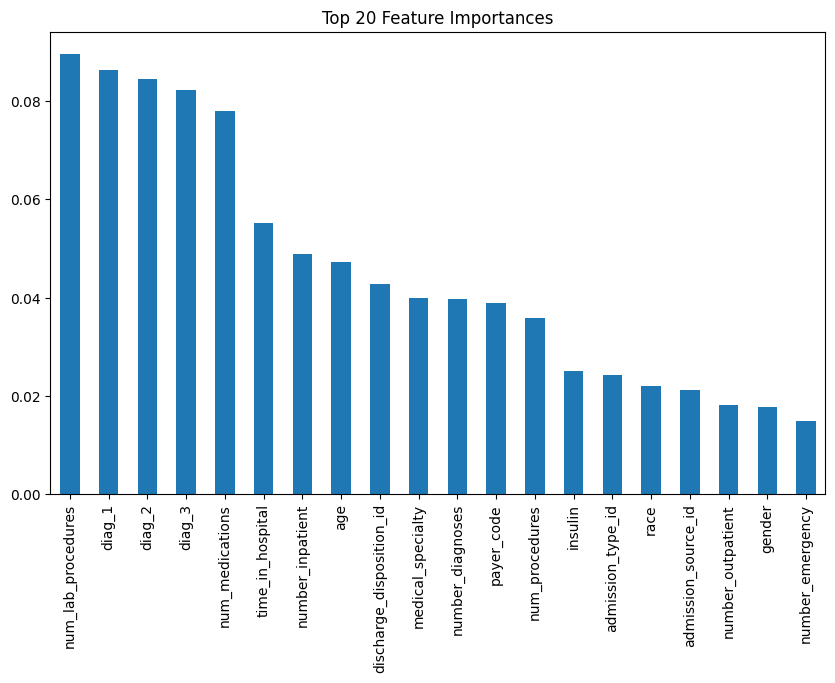

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X_encoded.columns
feat_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

feat_importance.head(20).plot(kind='bar', figsize=(10, 6))
plt.title("Top 20 Feature Importances")
plt.show()


In [29]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Encode categorical
X_encoded = X.copy()
label_encoders = {}
for col in X_encoded.select_dtypes(include='object'):
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le

# Binary target
y_binary = y['readmitted'].replace({'NO': 0, '>30': 1, '<30': 1})

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_binary, test_size=0.2, stratify=y_binary, random_state=42
)

# SMOTE oversampling
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


<ipython-input-29-2197316897>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_binary = y['readmitted'].replace({'NO': 0, '>30': 1, '<30': 1})


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define model
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid search
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train_sm, y_train_sm)

# Best model
best_model = grid_search.best_estimator_
print("Best Params:", grid_search.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [31]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[7486 3487]
 [3889 5492]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.68      0.67     10973
           1       0.61      0.59      0.60      9381

    accuracy                           0.64     20354
   macro avg       0.63      0.63      0.63     20354
weighted avg       0.64      0.64      0.64     20354



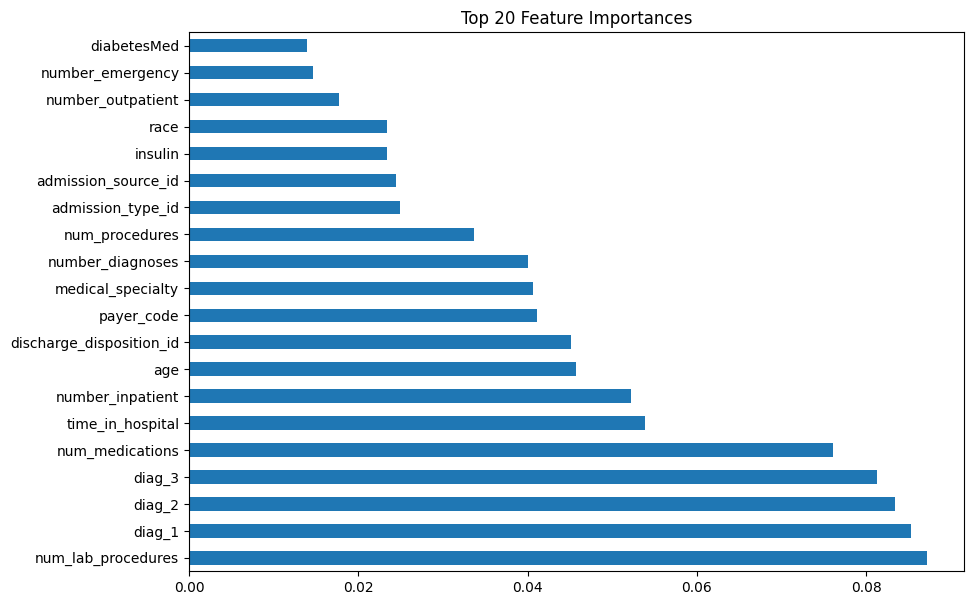

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

feat_imp = pd.Series(best_model.feature_importances_, index=X_encoded.columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(10, 7))
plt.title("Top 20 Feature Importances")
plt.show()
